## Initialization

In [40]:
# General definitions
%run '../definitions.ipynb'
%run '../treemakers.ipynb'
%run '../Analysis_class.ipynb'

import pandas as pd

In [41]:
processed_data_path = '/data/xenon/xams/run8/processed_v2_medium/'
minitree_path = '/data/xenon/xams/run8/minitrees/'

In [42]:
# Long runs limited to 6 hours because of S2 decrease.
run_names_ambe_1 = get_run_list(processed_data_path, '170321_155957', '170321_214847') # Last file: 170322_081037
run_names_ambe_2 = get_run_list(processed_data_path, '170322_154130', '170322_213020') # Last file: 170322_233141
run_names_bg     = get_run_list(processed_data_path, '170323_175029', '170323_232220') # Last file: 170324_072500
run_names_cs     = get_run_list(processed_data_path, '170323_144804', '170323_151843') # 
run_names_na_0   = get_run_list(processed_data_path, '170323_121631', '170323_134830') # DAQ crashes in here
run_names_na_1   = get_run_list(processed_data_path, '170323_140425', '170323_142831') # 

# UNPROCESSED FILES AS OF AUGUST 30, 2017
# 170324_115549_pre_crash
# run_names_ambe_0 = get_run_list(processed_data_path, '170320_160942', '170320_160942') # Just one file, half hour

run_names_ambe_low = get_run_list(processed_data_path, '170324_093626', '170324_124119')
run_names_cs_low   = get_run_list(processed_data_path, '170324_130241', '170324_144835')

Run list contains 24 files
Run list contains 24 files
Run list contains 12 files
Run list contains 5 files
Run list contains 6 files
Run list contains 4 files
Run list contains 12 files
Run list contains 7 files


## High field

In [43]:
def read_and_cut(run_names, processed_data_path, minitree_path, treemakers = None, **kwargs):
    x = XAMSAnalysis(run_names, processed_data_path, minitree_path)
    x.load(treemakers=  treemakers, **kwargs)
    x.corr_z(1.5, 1.73)
    x.corr_s1_ly_poly(ly_filename='../light_yield/data/cs137_ly_p2_sel2.pickle')
    x.corr_s2_electron_lifetime(pickle_file='../light_yield/data/cs137_electron_lifetime_sel2.pickle', verbose=True)
    x.cut_interaction_exists()
    x.cut_time_since_previous()
    x.cut_fiducial_volume()
    # x.cut_s2_range_50p_area(pickle_file='../light_yield/data/cs137_s2_width.pickle')
    x.cut_thresholds(s1_threshold=0, s2_threshold=100.)
    x.cut_largest_other_s1()
    x.cut_largest_other_s2() 

    print('Events left: %.1f k' % (len(x.d)/1000))
    return x

In [44]:
treemakers = ['Basics', 'Fundamentals', S1TimeProperties]

In [45]:
ambe_1 = read_and_cut(run_names_ambe_1, processed_data_path, minitree_path, treemakers = treemakers)
ambe_2 = read_and_cut(run_names_ambe_2, processed_data_path, minitree_path, treemakers = treemakers)
bg     = read_and_cut(run_names_bg, processed_data_path, minitree_path, treemakers = treemakers)
cs     = read_and_cut(run_names_cs, processed_data_path, minitree_path, treemakers = treemakers)
na_0   = read_and_cut(run_names_na_0, processed_data_path, minitree_path, treemakers = treemakers + [NaIProperties])
na_1   = read_and_cut(run_names_na_1, processed_data_path, minitree_path, treemakers = treemakers + [NaIProperties])


INFO:hax.__init__] Not looking for datasets in runs, db since you put use_runs_db = False


Loaded 1828149 (1828.1 k) events.
Total live time: 21598.4 seconds (6.0 hours)
Using lifetime 810.658412
Finite s1 selection: 538676 rows removed (70.53% passed)
ms_since_previous_event above 1.0 selection: 145398 rows removed (88.72% passed)
z in [-9.5, -0.5) selection: 181373 rows removed (84.15% passed)
s1 above 0 selection: 0 rows removed (100.00% passed)
s2 above 100.0 selection: 18132 rows removed (98.12% passed)


INFO:hax.__init__] Not looking for datasets in runs, db since you put use_runs_db = False


largest_other_s1 below 5 selection: 244802 rows removed (74.08% passed)
largest_other_s2 below 100.0 selection: 151719 rows removed (78.32% passed)
Events left: 548.0 k
Loaded 2289266 (2289.3 k) events.
Total live time: 21598.0 seconds (6.0 hours)
Using lifetime 810.658412
Finite s1 selection: 922219 rows removed (59.72% passed)
ms_since_previous_event above 1.0 selection: 217200 rows removed (84.11% passed)
z in [-9.5, -0.5) selection: 189209 rows removed (83.54% passed)
s1 above 0 selection: 0 rows removed (100.00% passed)


INFO:hax.__init__] Not looking for datasets in runs, db since you put use_runs_db = False


s2 above 100.0 selection: 21639 rows removed (97.75% passed)
largest_other_s1 below 5 selection: 172531 rows removed (81.63% passed)
largest_other_s2 below 100.0 selection: 174429 rows removed (77.24% passed)
Events left: 592.0 k
Loaded 1580816 (1580.8 k) events.
Total live time: 21597.6 seconds (6.0 hours)
Using lifetime 810.658412
Finite s1 selection: 554016 rows removed (64.95% passed)
ms_since_previous_event above 1.0 selection: 124486 rows removed (87.88% passed)
z in [-9.5, -0.5) selection: 148459 rows removed (83.55% passed)
s1 above 0 selection: 0 rows removed (100.00% passed)
s2 above 100.0 selection: 14414 rows removed (98.09% passed)
largest_other_s1 below 5 selection: 129642 rows removed (82.47% passed)
largest_other_s2 below 100.0 selection: 125435 rows removed (79.43% passed)

INFO:hax.__init__] Not looking for datasets in runs, db since you put use_runs_db = False



Events left: 484.4 k


INFO:hax.__init__] Not looking for datasets in runs, db since you put use_runs_db = False


Loaded 353546 (353.5 k) events.
Total live time: 1501.7 seconds (0.4 hours)
Using lifetime 810.658412
Finite s1 selection: 122636 rows removed (65.31% passed)
ms_since_previous_event above 1.0 selection: 52871 rows removed (77.10% passed)
z in [-9.5, -0.5) selection: 27549 rows removed (84.53% passed)
s1 above 0 selection: 0 rows removed (100.00% passed)
s2 above 100.0 selection: 4054 rows removed (97.31% passed)
largest_other_s1 below 5 selection: 41904 rows removed (71.38% passed)
largest_other_s2 below 100.0 selection: 22727 rows removed (78.26% passed)
Events left: 81.8 k


INFO:hax.__init__] Not looking for datasets in runs, db since you put use_runs_db = False


Loaded 169435 (169.4 k) events.
Total live time: 1285.4 seconds (0.4 hours)
Using lifetime 810.658412
Finite s1 selection: 19474 rows removed (88.51% passed)
ms_since_previous_event above 1.0 selection: 17123 rows removed (88.58% passed)
z in [-9.5, -0.5) selection: 12755 rows removed (90.40% passed)
s1 above 0 selection: 0 rows removed (100.00% passed)
s2 above 100.0 selection: 2342 rows removed (98.05% passed)
largest_other_s1 below 5 selection: 39978 rows removed (66.05% passed)
largest_other_s2 below 100.0 selection: 17363 rows removed (77.67% passed)
Events left: 60.4 k
Loaded 168925 (168.9 k) events.
Total live time: 1206.6 seconds (0.3 hours)
Using lifetime 810.658412
Finite s1 selection: 21331 rows removed (87.37% passed)
ms_since_previous_event above 1.0 selection: 17071 rows removed (88.43% passed)
z in [-9.5, -0.5) selection: 13364 rows removed (89.76% passed)
s1 above 0 selection: 0 rows removed (100.00% passed)
s2 above 100.0 selection: 2354 rows removed (97.99% passed)
la

### S2 decrease correction

Will do a linear correction for the long, non-reset runs only. 

In [46]:
plot_s2_decrease = False

# Linear correction
# n_time_bins = 6, cs1_range = (175, 225)
s2_decrease_parameters_ambe_1 = [  2.12374448e+04,  -6.19573325e-01]
s2_decrease_parameters_ambe_2 = [  2.15304141e+04,  -8.18352913e-01]
s2_decrease_parameters_bg     = [  2.13347799e+04,  -7.82306754e-01] # missing one data sets


# Quadratic correction
s2_decrease_parameters_p2_ambe_2 = [  2.02821150e+04,  -5.40122486e-01,  -1.16721434e-05]

In [47]:
ambe_1.corr_s2_decrease(s2_decrease_parameters_ambe_1, plot=plot_s2_decrease, 
                        apply=True, bins=30, range=((0, 3600 *6), (0, 40e3)))
if plot_s2_decrease:
    plt.colorbar()
    plt.savefig('figs/s2_decrease_correction.png', bbox_inches = 'tight')
    plt.show()

In [48]:
ambe_2.corr_s2_decrease(s2_decrease_parameters_ambe_2, plot=plot_s2_decrease, 
                        apply=True, bins=30, range=((0, 3600 *6), (0, 40e3)))
if plot_s2_decrease:
    plt.colorbar()
    plt.show()

In [49]:
bg.corr_s2_decrease(s2_decrease_parameters_bg, plot=plot_s2_decrease, 
                    apply=True, bins=30, range=((0, 3600 *6), (0, 40e3)))
if plot_s2_decrease:
    plt.colorbar()
    plt.show()

### Low energy

In [50]:
cs1_max = 400
cs2_max = 200e3

In [51]:
df_list = [ambe_1, ambe_2, bg, cs, na_0, na_1]

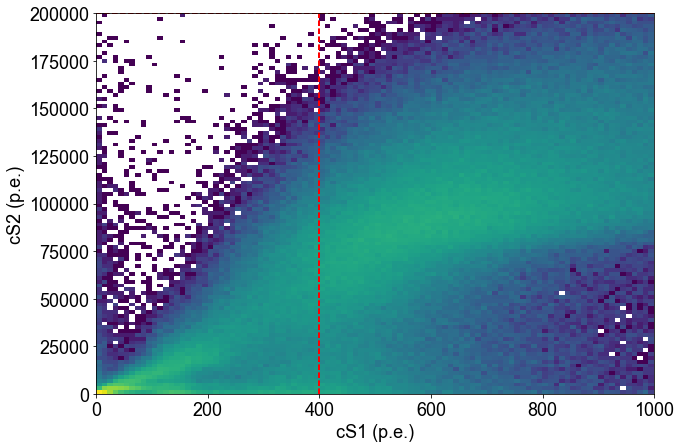

cs1 below 400 selection: 426069 rows removed (22.26% passed)
cs2 below 200000.0 selection: 18 rows removed (99.99% passed)


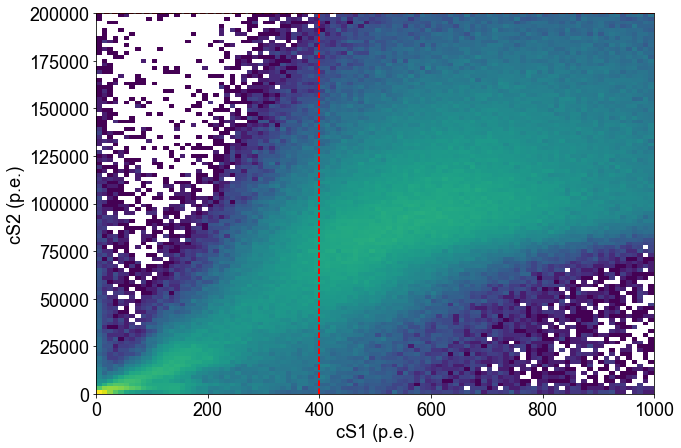

cs1 below 400 selection: 465509 rows removed (21.37% passed)
cs2 below 200000.0 selection: 540 rows removed (99.57% passed)


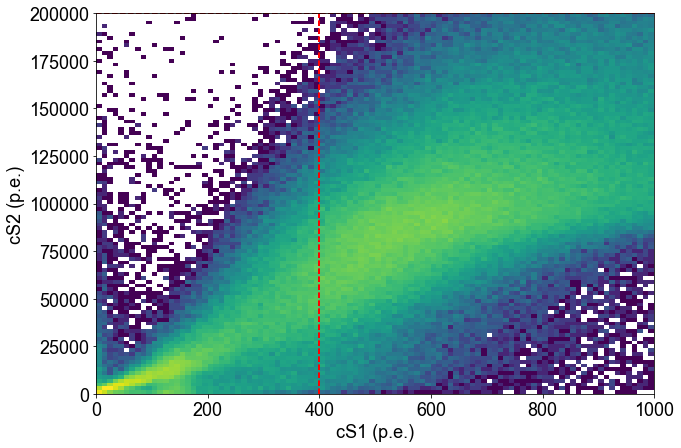

cs1 below 400 selection: 398502 rows removed (17.73% passed)
cs2 below 200000.0 selection: 56 rows removed (99.93% passed)


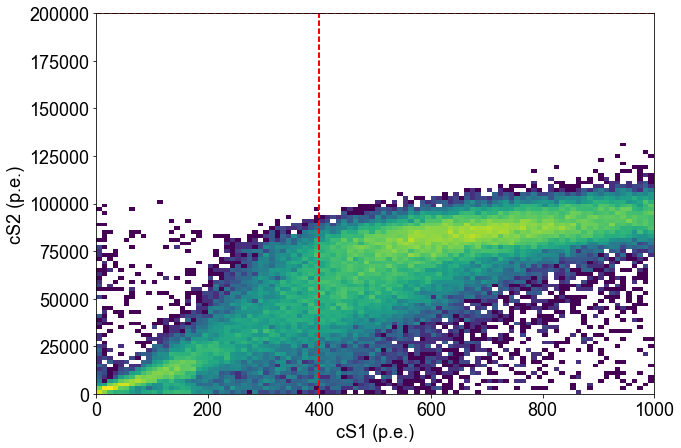

cs1 below 400 selection: 65198 rows removed (20.30% passed)
cs2 below 200000.0 selection: 0 rows removed (100.00% passed)


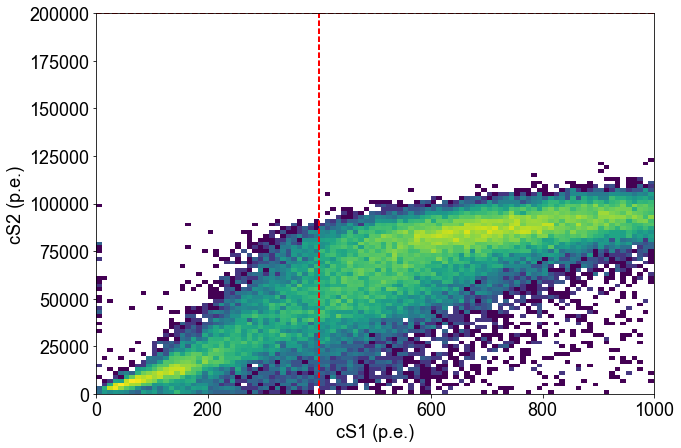

cs1 below 400 selection: 49657 rows removed (17.79% passed)
cs2 below 200000.0 selection: 0 rows removed (100.00% passed)


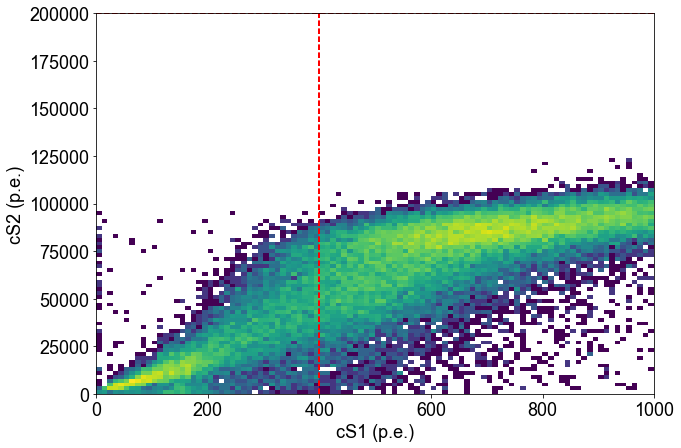

cs1 below 400 selection: 48777 rows removed (18.30% passed)
cs2 below 200000.0 selection: 0 rows removed (100.00% passed)


In [52]:
for df in df_list:
    df.cut_low_energy(cs1_max  = cs1_max, cs2_max = cs2_max, plot = True, apply=True, norm = LogNorm(), 
                      range=((0, 1000), (0, 200e3)), bins=100)

### S2 width

In [53]:
# High width
for df in df_list:
    df.cut_s2_range_50p_area(dt_range = (5, 57), apply=True, plot=False)

# Low width
for df in df_list:
    df.cut_s2_range_50p_area_low(-50, apply=True)

Diffusion is 15.62 +- 0.24 +- 0.41 cm**2 / s
Diffusion is 15.62 +- 0.48 cm**2 / s
Cutoff at 251.5 ns
s2_width_difference below 251.5 selection: 1933 rows removed (98.42% passed)
Diffusion is 15.47 +- 0.29 +- 0.41 cm**2 / s
Diffusion is 15.47 +- 0.50 cm**2 / s
Cutoff at 251.5 ns
s2_width_difference below 251.5 selection: 2150 rows removed (98.29% passed)
Diffusion is 15.64 +- 0.42 +- 0.41 cm**2 / s
Diffusion is 15.64 +- 0.59 cm**2 / s
Cutoff at 251.5 ns
s2_width_difference below 251.5 selection: 1039 rows removed (98.79% passed)
Diffusion is 17.92 +- 0.62 +- 0.41 cm**2 / s
Diffusion is 17.92 +- 0.75 cm**2 / s
Cutoff at 251.5 ns
s2_width_difference below 251.5 selection: 123 rows removed (99.26% passed)
Diffusion is 15.16 +- 1.35 +- 0.41 cm**2 / s
Diffusion is 15.16 +- 1.41 cm**2 / s
Cutoff at 251.5 ns
s2_width_difference below 251.5 selection: 65 rows removed (99.39% passed)
Diffusion is 17.78 +- 1.10 +- 0.41 cm**2 / s
Diffusion is 17.78 +- 1.18 cm**2 / s
Cutoff at 251.5 ns
s2_width_dif

### Combine data and add waveforms

In [54]:
# Combine data for same sources
na = combine_frameworks(na_0, na_1)
ambe = combine_frameworks(ambe_1, ambe_2)

In [55]:
# Add waveforms... This step may take a while (especially if cache files need to be built)
ambe.add_s1_waveforms()
bg.add_s1_waveforms()
cs.add_s1_waveforms()
na.add_s1_waveforms()

In [56]:
# Alias for AmBe: NR
nr = ambe
er = combine_frameworks([bg, cs, na])
# er = combine_frameworks(er, na)

### NR/ER selection

In [57]:
# Function definitions
def nr_low(s1):
    # Piecewise def
    return np.array([300*np.sqrt(_s1 - 10) + 0  if _s1>10 else 100 for _s1 in s1])

def nr_high(s1):
    return 350*np.sqrt(s1 - 0) + 1000

# Function definitions
def er_low(s1):
    return 60 * s1 + 0

def er_high(s1):
    return 100 * s1 + 3e3

In [58]:
def cut_band(x, band_type):
    if band_type == 'nr':
        low_function = nr_low
        high_function = nr_high
    elif band_type == 'er':
        low_function = er_low
        high_function = er_high
    else:
        raise ValueError('What band do YOU want? You gave this: %s' % band_type)
    
    xnew = deepcopy(x)
    
    xnew.d = cuts.selection(xnew.d, xnew.d['cs2'] < high_function(xnew.d['cs1']), '%s band upper limit' % band_type)
    xnew.d = cuts.selection(xnew.d, xnew.d['cs2'] > low_function(xnew.d['cs1']), '%s band lower limit' % band_type)
    
    return xnew

In [65]:
def plot_band(band_type, x_plot = np.linspace(0, 400, 401), **kwargs):
    if band_type == 'nr':
        low_function = nr_low
        high_function = nr_high
    elif band_type == 'er':
        low_function = er_low
        high_function = er_high
    else:
        raise ValueError('What band do YOU want? You gave this: %s' % band_type)
        
    for f in (low_function, high_function):
        plt.plot(x_plot, f(x_plot), **kwargs)
    return

In [70]:
nr_nrsel = cut_band(nr, 'nr')
nr_ersel = cut_band(nr, 'er')
er_ersel = cut_band(er, 'er')
bg_nrsel = cut_band(bg, 'nr')

nr band upper limit selection: 164522 rows removed (20.15% passed)
nr band lower limit selection: 11215 rows removed (72.99% passed)
er band upper limit selection: 105324 rows removed (48.88% passed)
er band lower limit selection: 34813 rows removed (65.44% passed)
er band upper limit selection: 51824 rows removed (47.48% passed)
er band lower limit selection: 11140 rows removed (76.22% passed)
nr band upper limit selection: 63118 rows removed (7.24% passed)
nr band lower limit selection: 2453 rows removed (50.17% passed)


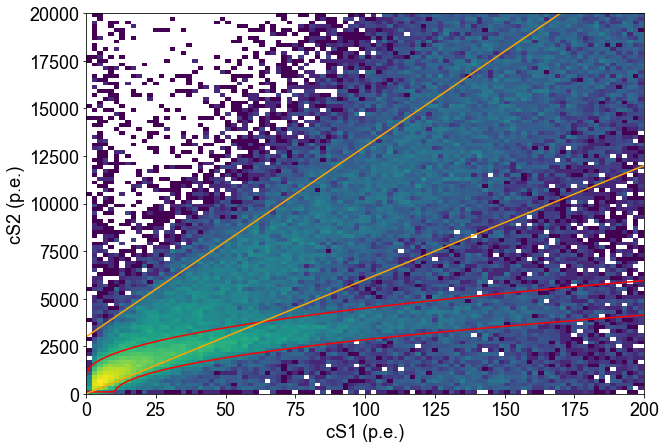

In [71]:
nr.plot_cs1cs2(bins=100, norm=LogNorm(), range=((0, 200), (0, 20e3)))
plot_band('nr', color='red')
plot_band('er', color='orange')
plt.show()

### Proper band selection

Pending... 

In [ ]:
# Function definitions
def nr_low(s1):
    # Piecewise def
    return np.array([300*np.sqrt(_s1 - 10) + 0  if _s1>10 else 100 for _s1 in s1])

def nr_high(s1):
    return 350*np.sqrt(s1 - 0) + 1000

# Function definitions
def er_low(s1):
    return 60 * s1 + 0

def er_high(s1):
    return 100 * s1 + 3e3

### Apply selection

Note to self. This may be better put in the XAMSAnalysis framework... (Including the spectrum!)

### Inspect cS1 spectrum

In [72]:
print('Pending, check new function!')

Pending, check new function!


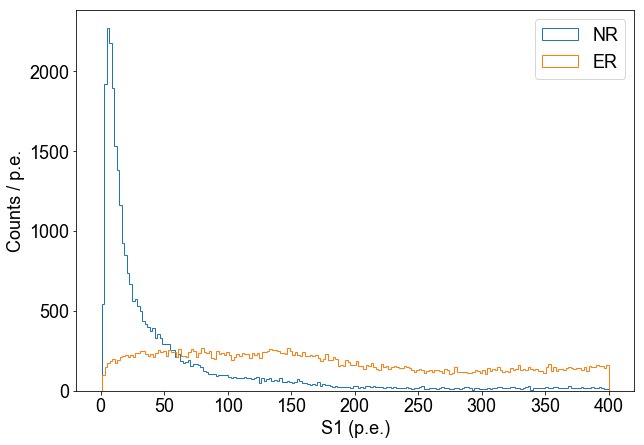

In [44]:
plt.hist(d_nr['cs1'], histtype='step', bins=200, label='NR')
plt.hist(d_er['cs1'], histtype='step', bins=200, label='ER')
plt.xlabel('S1 (p.e.)')
plt.ylabel('Counts / p.e.')
plt.legend()
plt.show()

In [52]:
t_nr = nr.livetime
t_bg = bg.livetime
print(t_nr / 3600, t_bg / 3600)

counts_nr, bin_edges_cs1  = np.histogram(d_nr['cs1'], bins=200, range=(0, cs1_max))
counts_er, _              = np.histogram(d_er['cs1'], bins=200, range=(0, cs1_max))
counts_bg_nr, _           = np.histogram(d_bg_nr['cs1'], bins=200, range=(0, cs1_max))
counts_bg_er, _           = np.histogram(d_bg_er['cs1'], bins=200, range=(0, cs1_max))
counts_ambe_er, _         = np.histogram(d_ambe_er['cs1'], bins=200, range=(0, cs1_max))

bins_cs1 = 0.5 *(bin_edges_cs1[1:] + bin_edges_cs1[:-1])

11.999008793 5.9993396372


/home/erik/anaconda3/envs/pax_new/lib/python3.4/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in true_divide


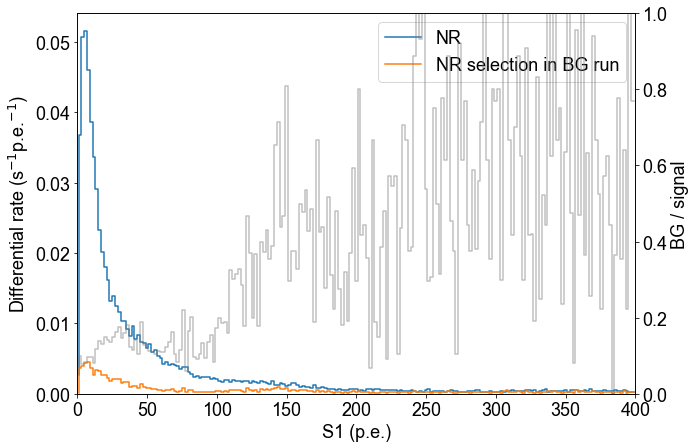

In [57]:
plt.plot(bins_cs1, 1/t_nr * counts_nr, ls='steps', label = 'NR')
plt.plot(bins_cs1, 1/t_bg * counts_bg_nr, ls='steps', label= 'NR selection in BG run')
plt.ylim(0,)
plt.xlabel('S1 (p.e.)')
plt.ylabel('Differential rate (s$^{-1}$p.e.$^{-1}$)')
plt.legend()

plt.twinx()
plt.plot(bins_cs1, 1/((1/t_nr * counts_nr) / (1/t_bg * counts_bg_nr)), ls='steps', label = 'NR', color='gray', alpha=0.5)
plt.ylabel('BG / signal')
plt.ylim(0,1)
plt.xlim(0, cs1_max)
plt.show()

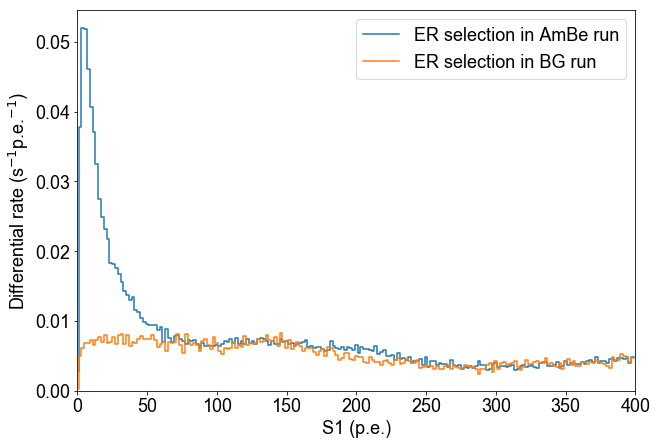

In [50]:
plt.plot(bins_cs1, 1/t_nr * counts_ambe_er, ls='steps', label = 'ER selection in AmBe run')
plt.plot(bins_cs1, 1/t_bg * counts_bg_er, ls='steps', label= 'ER selection in BG run')
plt.legend()
plt.xlabel('S1 (p.e.)')
plt.ylabel('Differential rate (s$^{-1}$p.e.$^{-1}$)')
plt.xlim(0, cs1_max)
plt.ylim(0)
plt.show()

### Pulses

#### Functions

In [83]:
def integrate_until_fraction(w, area_tot, fractions_desired, results):
    """For array of fractions_desired, integrate w until fraction of area is reached, place sample index in results
    Will add last sample needed fractionally.
    eg. if you want 25% and a sample takes you from 20% to 30%, 0.5 will be added.
    Assumes fractions_desired is sorted and all in [0, 1]!
    This function is stolen and modified from Pax - Erik Hogenbirk September 2017
    """
    fraction_seen = 0
    current_fraction_index = 0
    needed_fraction = fractions_desired[current_fraction_index]
    for i, x in enumerate(w):
        # How much of the area is in this sample?
        fraction_this_sample = x/area_tot
        # Will this take us over the fraction we seek?
        # Must be while, not if, since we can pass several fractions_desired in one sample
        while fraction_seen + fraction_this_sample >= needed_fraction:
            # Yes, so we need to add the next sample fractionally
            area_needed = area_tot * (needed_fraction - fraction_seen)
            if x != 0:
                results[current_fraction_index] = i + area_needed/x
            else:
                results[current_fraction_index] = i
            # Advance to the next fraction
            current_fraction_index += 1
            if current_fraction_index > len(fractions_desired) - 1:
                return
            needed_fraction = fractions_desired[current_fraction_index]
        # Add this sample's area to the area seen, advance to the next sample
        fraction_seen += fraction_this_sample
    if needed_fraction == 1:
        results[current_fraction_index] = len(w)
    else:
        return -1

In [138]:
def add_percentiles(d, fractions_desired = [0.1, 0.2, 0.3, 0.4]):
    '''
    Compute the point in the S1 waveform where 10, 20, 30 and 40 percent of the area is reached.
    Adds properties to the dataframe: `s1_X0p_point` and `s1_fraction_outside_pulse`.
    Time in ns since start of pulse (pulse[0] = 0 ns)
    '''
    s1_percentile_points = []
    s1_area_fraction_outside_pulse = []
    
    for i, ev in d.iterrows():
        pulse = np.array(ev['s1_pulse'])
        area_times = np.ones(4) * float('nan')
        area_tot = ev['s1']
        return_status = integrate_until_fraction(
            pulse, area_tot, fractions_desired=fractions_desired, results=area_times)
        if return_status == -1:
            print('Warning: fraction not reached in event %d of run %d' % (ev['event_number'], 
                                                                          ev['run_number']))
        s1_percentile_points.append(2. * area_times) # Correct for 2 ns here
        s1_area_fraction_outside_pulse.append(1 - np.sum(pulse) / ev['s1'])
        
    s1_percentile_points = np.array(s1_percentile_points)
    for i, fraction in enumerate(fractions_desired):
        d['s1_%d_percentile_point' % (fraction * 100)] = s1_percentile_points[:, i]        
    d['s1_fraction_outside_pulse'] = s1_area_fraction_outside_pulse
    return 
        

def build_pulse_hist_entries(d, alignment_field):
    '''
    Align the S1 pulses. This assumes 400 ns of data and a field (`alignment_field`) that is given in units of 
    time since start of waveform in ns. This is put at the zero point, which is 100 ns in the waveform.
    The function returns two arrays, one containing the time points (shifted by the alignment field) and 
    one containing the weight, so that lower-than 1 bin sampling and alignment is possible.
    '''
    time_edges = np.linspace(-100, 300, 201)
    # Arbitrarily put the first sample EXACTLY at zero rather than at bin edges
    time = time_edges[:-1]
    time_entries = []
    weight_entries = []
    
    for i, ev in d.iterrows():
        time_entries.append(time + 100 - ev[alignment_field])
        weight_entries.append(np.array(ev['s1_pulse']) / ev['s1'])
    
    return np.concatenate(time_entries), np.concatenate(weight_entries)

def compute_average_pulse(d, alignment_field, dt = 2):
    '''
    Compute the average pulse, calling the underlying `build_pulse_hist_entries` routine. 
    This assumes 400 ns of data and a field (`alignment_field`) that is given in units of 
    time since start of waveform in ns. This is put at the zero point, which is 100 ns in the waveform.
    dt is sample time in ns, which may be lower than the raw sample of 2 ns. Go ahead and try!
    '''
    n_bins_time = np.floor(400 / dt) + 1
    if 400 % dt:
        print('Warning: please use a divisor of 400 for your time bins (i.e. 1, 0.2, 200, ...) .')
    time_edges = np.linspace(-100, 300, n_bins_time)
    times, weights = build_pulse_hist_entries(d, alignment_field)
    
    # This takes only the left bin edges, so that the first sample is zero.
    time = time_edges[:-1]
    amplitude, _ = np.histogram(times, bins=time_edges, weights=weights)
    # Normalization
    amplitude = amplitude / len(d) / dt
    
    return time, amplitude

def plot_average_pulse_in_slice(d, alignment_field, dt = 2, cs1_range=(0, np.inf), **kwargs):
    sel = (d['cs1'] >= cs1_range[0]) & (d['cs1'] < cs1_range[1])
    time, average_pulse = compute_average_pulse(d[sel], alignment_field, dt)
    plt.plot(time, average_pulse, **kwargs)
    plt.xlabel('Time (ns)')
    plt.ylabel('Average pulse ((%d ns)$^{-1}$)' % dt)
    return 

#### Compare!

This should be done in the XAMSAnalysis object now. 

In [85]:
# This adds the percentiles based on the pulse waveform...
for x in [nr_nrsel, nr_ersel, er_ersel, bg_nrsel]:
    add_percentiles(x.d)

WARNING fraction not reached
WARNING fraction not reached
WARNING fraction not reached
WARNING fraction not reached
WARNING fraction not reached
WARNING fraction not reached
WARNING fraction not reached
WARNING fraction not reached
WARNING fraction not reached
WARNING fraction not reached
WARNING fraction not reached


In [117]:
def add_percentiles_from_pax(d, fractions_desired = [0.1, 0.2, 0.3, 0.4]):
    '''
    Compute the position in ns in the waveform where a certain fraction of the area is reached. Should give the same as 
    add_percentiles!
    '''
    for frac in fractions_desired:
        pct = frac * 100
        shift_from_midpoint = d['s1_time_from_midpoint_%dp' % pct]
        shift_error = d['s1_center_time'] - round(d['s1_center_time'] / 2) * 2
        shift_from_center_to_midpoint = d['s1_area_midpoint'] - d['s1_center_time']
        d['s1_%d_percentile_point_pax' % pct] = 100 + shift_from_center_to_midpoint + shift_from_midpoint + shift_error
    return


In [120]:
for x in [nr_nrsel, nr_ersel, er_ersel, bg_nrsel]:
    add_percentiles_from_pax(x.d)

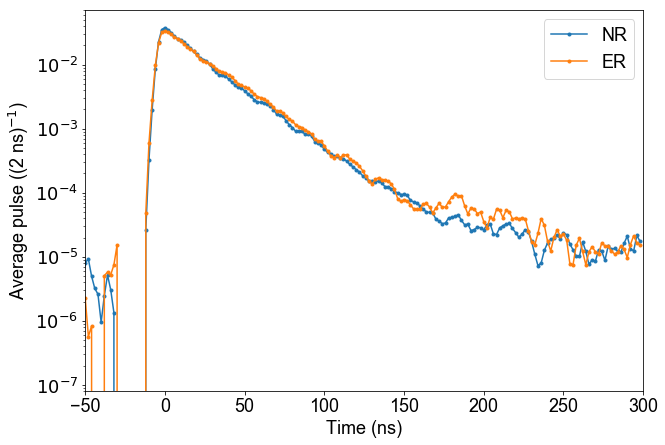

In [150]:
plot_average_pulse_in_slice(nr_nrsel.d, 's1_10_percentile_point_pax', dt=2, cs1_range=(30, 40), label='NR', marker='.')
plot_average_pulse_in_slice(er_ersel.d, 's1_10_percentile_point_pax', dt=2, cs1_range=(30, 40), label='ER', marker='.')
plt.xlim(-50, 300)
plt.legend()
plt.yscale('log')
plt.show()

### Dump objects to file

In [151]:
pickle.dump((nr_nrsel.d, er_ersel.d, bg_nrsel.d), open('highfield_dataframes.pickle', 'wb'))

## Open questions

  * Why does the distribution in cS1/cS2 look so different for Na22?
  * What is that population with low width?
  * Is the difference in S2 width due to a different liquid level?
  * As the ER band rate is the same at high cS1 in AmBe/BG, why is the rate below the band higher? 
  * What is the equivalent energy in the cS1/cS2 plot? How for does the NR spectrum go?
  * What is that crap below the ER band at 150 p.e. cS1?

## Checks and secondary effects

### The Weird Population

After some careful consideration and discussion with Sander, consider the following...

There are more events below the bands than above it, suggesting that we lose S2 but not S1 (electrons lost but not photons). If the events below the band are selected, you can see that the events seem to be good, legitimate events:
- The S2 AFT is in bounds (suggesting it's a true S2)
- The S1 AFT is in agreement with the z-position (the S1-S2 pair is correct, also, probably no gamma-X)
- No time dependance

Where do we see weird things? Well, the following:
- The **S2 width is low**. This effect is isolated in the following graph.
- There is a mild bias in z.

What could it be? Most likely explanation: it is events at the edges. This would explain why we do not see it in high energy sources (Na): the low energy scatters coming from BG are probably largely due to low-energy gammas with a very low stopping power. These'll be stopped at the edges. If it is at the edges, the path through the the gas might be shorter due to the capillary effect. 

That said... It's also in the Cs data. But wait, is it also in the Na data? It could still be background...



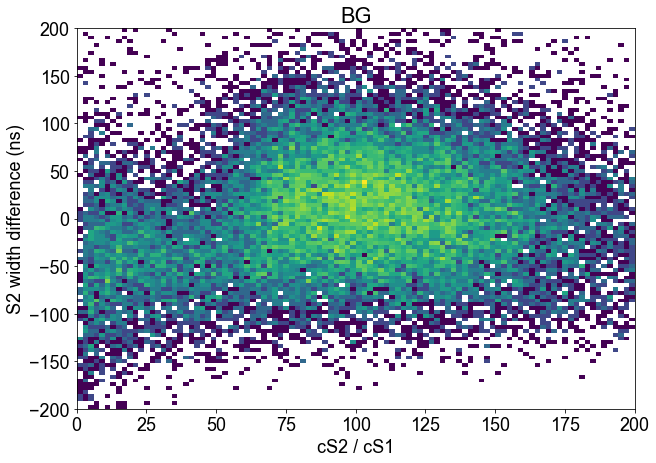

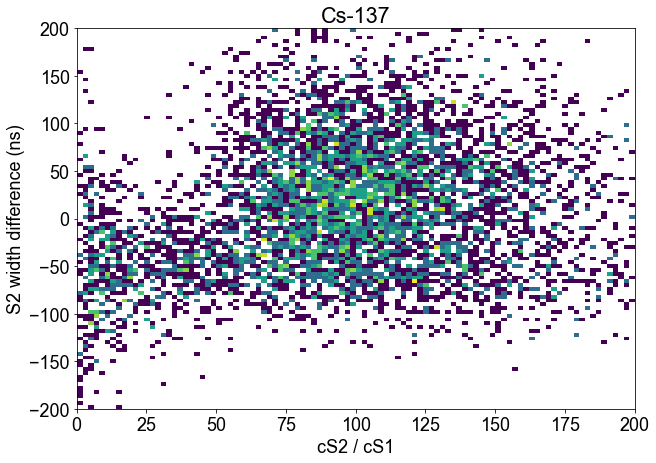

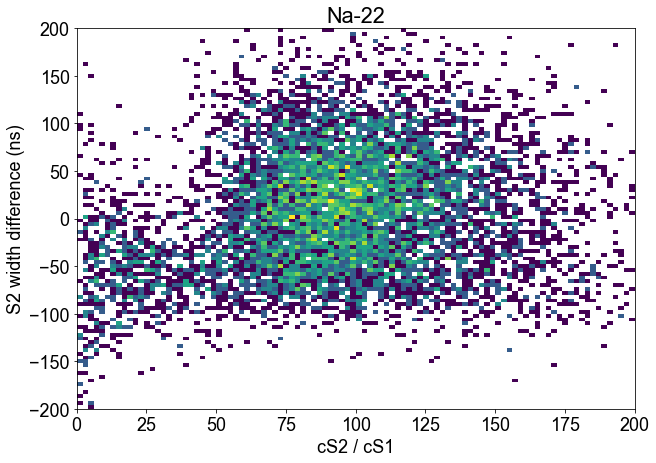

In [17]:
plt.hist2d(bg.d['cs2'] / bg.d['cs1'], bg.d['s2_width_difference'], bins=100, norm=LogNorm(),
          range=((0, 200), (-200, 200)))
plt.xlabel('cS2 / cS1')
plt.ylabel('S2 width difference (ns)')
plt.title('BG')
plt.savefig('figs/s2_width_v_ratio.png', bbox_inches='tight')
plt.show()

plt.hist2d(cs.d['cs2'] / cs.d['cs1'], cs.d['s2_width_difference'], bins=100, norm=LogNorm(),
          range=((0, 200), (-200, 200)))
plt.xlabel('cS2 / cS1')
plt.ylabel('S2 width difference (ns)')
plt.title('Cs-137')
plt.show()

plt.hist2d(na.d['cs2'] / na.d['cs1'], na.d['s2_width_difference'], bins=100, norm=LogNorm(),
          range=((0, 200), (-200, 200)))
plt.xlabel('cS2 / cS1')
plt.ylabel('S2 width difference (ns)')
plt.title('Na-22')
plt.show()

### Weird population...

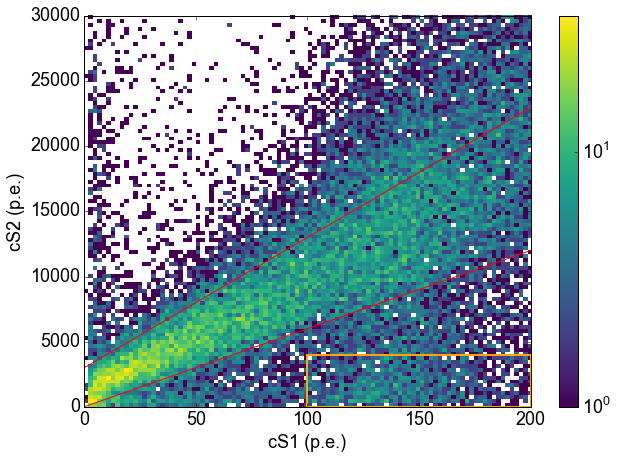

In [42]:
plt.plot(x_plot, er_high(x_plot), color='red')
plt.plot(x_plot, er_low(x_plot),  color='red')
bg.plot_cs1cs2(bins=100, range=((0, 200), (0, 30e3)), norm=LogNorm())
plt.colorbar()
draw_box((100, 200), (0, 4000), edgecolor='orange', lw=2)
plt.show()

In [43]:
len(bg.d) / (6 * 3600) #/ (0.2 * 0.085) 

1.3762962962962964

In [44]:
1 / (0.2 * 0.085) 

58.8235294117647

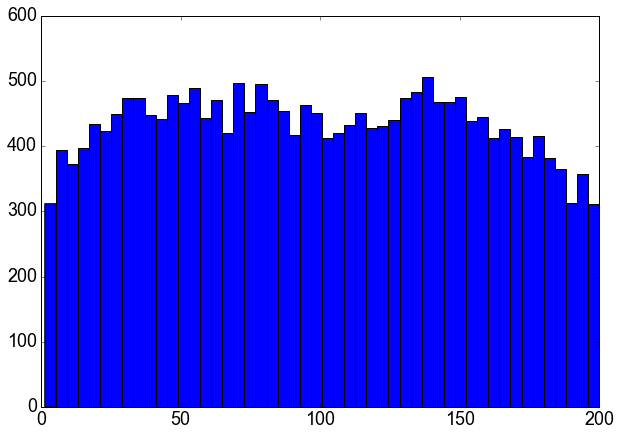

In [45]:
plt.hist(d_er['cs1'], bins=50)
plt.show()

In [46]:
good = d_er
good_low_s2 = cuts.range_selection(d_er, 'cs2', (0, 4000))
good_low_s1 = cuts.range_selection(d_er, 'cs1', (100, 200))

bad = cuts.range_selection(bg.d, 'cs1', (100, 200))
bad = cuts.range_selection(bad, 'cs2', (0, 4000))

cs2 in [0, 4000) selection: 18138 rows removed (16.25% passed)
cs1 in [100, 200) selection: 11034 rows removed (49.05% passed)
cs1 in [100, 200) selection: 12770 rows removed (57.04% passed)
cs2 in [0, 4000) selection: 14995 rows removed (11.58% passed)


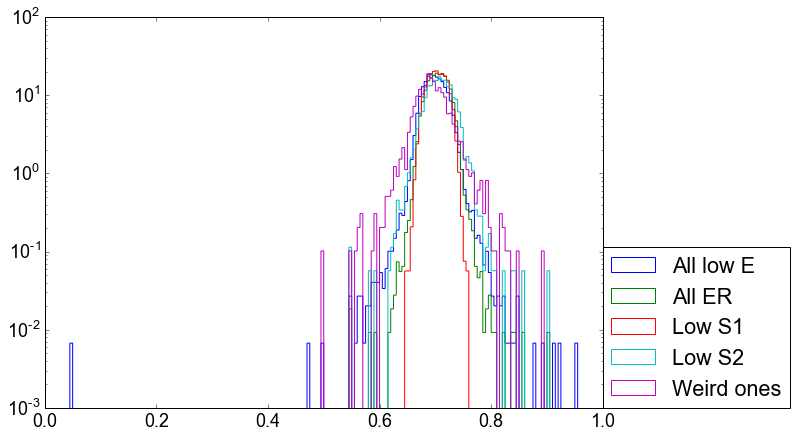

In [47]:
plt.hist(bg.d['s2_area_fraction_top'], bins=200, histtype='step', label='All low E', normed=True, range=(0,1))
plt.hist(good['s2_area_fraction_top'], bins=200, histtype='step', label='All ER', normed=True, range=(0,1))
plt.hist(good_low_s1['s2_area_fraction_top'], bins=200, histtype='step', label='Low S1', normed=True, range=(0,1))
plt.hist(good_low_s2['s2_area_fraction_top'], bins=200, histtype='step', label='Low S2', normed=True, range=(0,1))
plt.hist(bad['s2_area_fraction_top'], bins=200, histtype='step', label='Weird ones', normed=True, range=(0,1))
plt.yscale('log')
plt.legend(loc=(1,0))
plt.show()

In [48]:
plt.hist(bg.d['s1_aft_difference'], bins=200, histtype='step', label='All low E', normed=True, range=(0,1))
plt.hist(good['s1_aft_difference'], bins=200, histtype='step', label='All ER', normed=True, range=(0,1))
plt.hist(good_low_s1['s1_aft_difference'], bins=200, histtype='step', label='Low S1', normed=True, range=(0,1))
plt.hist(good_low_s2['s1_aft_difference'], bins=200, histtype='step', label='Low S2', normed=True, range=(0,1))
plt.hist(bad['s1_aft_difference'], bins=200, histtype='step', label='Weird ones', normed=True, range=(0,1))
plt.yscale('log')
plt.legend(loc=(1,0))
plt.show()

KeyError: 's1_aft_difference'

In [ ]:
plt.hist(bg.d['t'], bins=200, histtype='step', label='All low E', normed=True, range=(0,6*3600))
plt.hist(good['t'], bins=200, histtype='step', label='All ER', normed=True, range=(0,6*3600))
plt.hist(good_low_s1['t'], bins=200, histtype='step', label='Low S1', normed=True, range=(0,6*3600))
plt.hist(good_low_s2['t'], bins=200, histtype='step', label='Low S2', normed=True, range=(0,6*3600))
plt.hist(bad['t'], bins=200, histtype='step', label='Weird ones', normed=True, range=(0,6*3600))
plt.yscale('log')
plt.legend(loc=(1,0))
plt.show()

In [ ]:
plt.hist(bg.d['z'], bins=200, histtype='step', label='All low E', normed=True, range=(-10,0))
plt.hist(good['z'], bins=200, histtype='step', label='All ER', normed=True, range=(-10,0))
plt.hist(good_low_s1['z'], bins=200, histtype='step', label='Low S1', normed=True, range=(-10,0))
plt.hist(good_low_s2['z'], bins=200, histtype='step', label='Low S2', normed=True, range=(-10,0))
plt.hist(bad['z'], bins=200, histtype='step', label='Weird ones', normed=True, range=(-10,0))
plt.yscale('log')
plt.legend(loc=(1,0))
plt.show()

In [ ]:
plt.scatter(good['drift_time'], good['s2_range_50p_area'], edgecolor='None', color='red', s=5)
plt.scatter(bad['drift_time'], bad['s2_range_50p_area'], edgecolor='None')
plt.axhline(100)

In [ ]:
ran = (-500, 500)

plt.hist(bg.d['s2_width_difference'], bins=200, histtype='step', label='All low E', normed=True, range=ran)
plt.hist(good['s2_width_difference'], bins=200, histtype='step', label='All ER', normed=True, range=ran)
plt.hist(good_low_s1['s2_width_difference'], bins=200, histtype='step', label='Low S1', normed=True, range=ran)
plt.hist(good_low_s2['s2_width_difference'], bins=200, histtype='step', label='Low S2', normed=True, range=ran)
plt.hist(bad['s2_width_difference'], bins=200, histtype='step', label='Weird ones', normed=True, range=ran)
# plt.yscale('log')
plt.legend(loc=(1,0))
plt.show()

In [ ]:
bg.cut_s1_aft(plot=True, apply=False)

In [ ]:
bla = bg.d

In [ ]:
# Error from near the edges where interpolation fails
bla = cuts.isfinite(bla, 's1_aft_difference')

In [ ]:
plt.set_cmap('jet')
plt.scatter(bla['cs1'], bla['cs2'], c=np.abs(bla['s1_aft_difference']), vmax= 0.1,
            edgecolor='None', marker='.', s=10)
plt.colorbar()
plt.xlim(0, 200)
plt.ylim(0, 30e3)

### Weird population NR

In [ ]:
ambe_1.plot_cs1cs2(bins=100, norm=LogNorm(), range=((0, 200), (0, 30000)))
plt.plot(x_plot, nr_low(x_plot))
plt.plot(x_plot, nr_high(x_plot))
draw_box((100, 200), (0, 2500), edgecolor='orange')

In [ ]:
good = d_nr
good_low_s2 = cuts.range_selection(d_nr, 'cs2', (0, 2500))
good_low_s1 = cuts.range_selection(d_er, 'cs1', (100, 200))

bad = cuts.range_selection(ambe_1.d, 'cs1', (100, 200))
bad = cuts.range_selection(bad, 'cs2', (0, 2500))

In [ ]:
ran = (-500, 500)

plt.hist(bg.d['s2_width_difference'], bins=200, histtype='step', label='All low E', normed=True, range=ran)
plt.hist(good['s2_width_difference'], bins=200, histtype='step', label='All NRa', normed=True, range=ran)
plt.hist(good_low_s1['s2_width_difference'], bins=200, histtype='step', label='Low S1', normed=True, range=ran)
plt.hist(good_low_s2['s2_width_difference'], bins=200, histtype='step', label='Low S2', normed=True, range=ran)
plt.hist(bad['s2_width_difference'], bins=200, histtype='step', label='Weird ones', normed=True, range=ran)
# plt.yscale('log')
plt.legend(loc=(1,0))
plt.show()

In [ ]:
plt.hist(bg.d['z'], bins=200, histtype='step', label='All low E', normed=True, range=(-10,0))
plt.hist(good['z'], bins=200, histtype='step', label='All ER', normed=True, range=(-10,0))
plt.hist(good_low_s1['z'], bins=200, histtype='step', label='Low S1', normed=True, range=(-10,0))
plt.hist(good_low_s2['z'], bins=200, histtype='step', label='Low S2', normed=True, range=(-10,0))
plt.hist(bad['z'], bins=200, histtype='step', label='Weird ones', normed=True, range=(-10,0))
plt.yscale('log')
plt.legend(loc=(1,0))
plt.show()

In [ ]:
plt.hist(bg.d['s2_area_fraction_top'], bins=200, histtype='step', label='All low E', normed=True, range=(0,1))
plt.hist(good['s2_area_fraction_top'], bins=200, histtype='step', label='All ER', normed=True, range=(0,1))
plt.hist(good_low_s1['s2_area_fraction_top'], bins=200, histtype='step', label='Low S1', normed=True, range=(0,1))
plt.hist(good_low_s2['s2_area_fraction_top'], bins=200, histtype='step', label='Low S2', normed=True, range=(0,1))
plt.hist(bad['s2_area_fraction_top'], bins=200, histtype='step', label='Weird ones', normed=True, range=(0,1))
plt.yscale('log')
plt.legend(loc=(1,0))
plt.show()

In [49]:
# def append_waveforms(df, run_names, verbose=False):
#     '''
#     Get the S1 pulse shape only for the events in the dataframe.
#     '''
#     assert (max(df['run_number']) +1 == len(run_names))    
#     d_s1pulse_list = []
#     for rn_i, rn in tqdm(enumerate(run_names)):
#         event_numbers_this_dataset = df[df['run_number'] == rn_i]['event_number'].values
#         if verbose: print(rn)
#         d_s1pulse = hax.minitrees.load(datasets=rn, treemakers=[S1Pulse], 
#                                 cache_file = '/home/erik/win/data/xams_run8/cache/%s_S1Pulse.cache' % rn) # cache file?
#         d_s1pulse = d_s1pulse[d_s1pulse['event_number'].isin(event_numbers_this_dataset)]
#         d_s1pulse_list.append(d_s1pulse)
#     s1_pulses_df = pd.concat(d_s1pulse_list)
#     s1_pulses = s1_pulses_df.s1_pulse.values
#     df['s1_pulse'] = s1_pulses 
#     return df

### Compute average pulse

Wait... What is the CURRENT alignment, anyway?

Well, it is aligned on the center time (area-weighted time), rounded to the next sample, which is at sample 50. Correct for this...

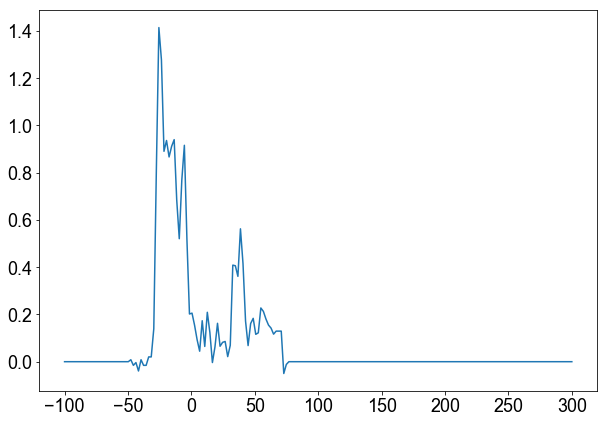

In [42]:
plt.plot(np.linspace(-100, 300, 200), d_nr['s1_pulse'].iloc[0])

### Apply the shift

s1 in [20, 30) selection: 25202 rows removed (10.90% passed)


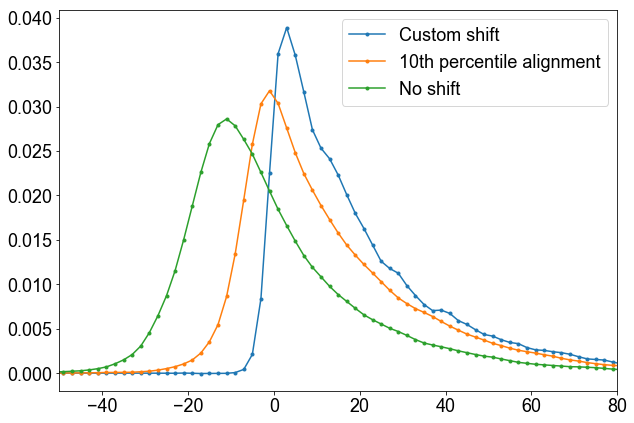

s1 in [190, 200) selection: 28182 rows removed (0.36% passed)
s1 in [190, 200) selection: 21237 rows removed (1.94% passed)
0.499755822445
0.499527714524


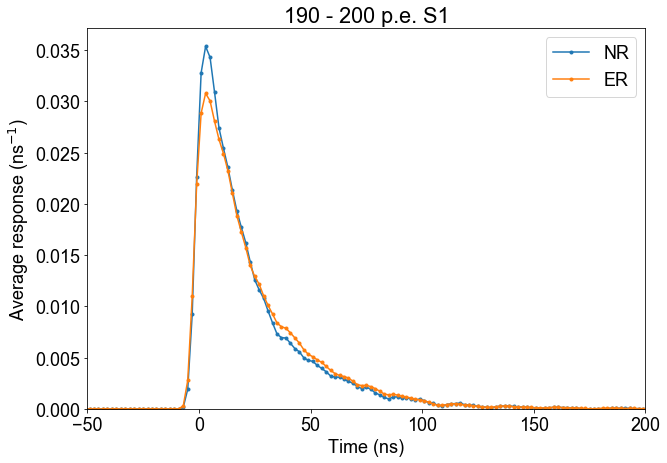

In [120]:
dt = 2
alignment_field = 's1_10p_point'

lower = 190
upper = 200


slice_nr = cuts.range_selection(d_nr, 's1', (lower, upper))
slice_er = cuts.range_selection(d_er, 's1', (lower, upper))

time, amplitude_nr = compute_average_pulse(slice_nr, alignment_field, dt=dt)
plt.plot(time, amplitude_nr, marker='.', label='NR')
print(sum(amplitude_nr))

time, amplitude_er = compute_average_pulse(slice_er, alignment_field, dt=dt)
plt.plot(time, amplitude_er, marker='.', label='ER')
print(sum(amplitude_er))
plt.xlim(-50, 200)
# plt.ylim(0)
# plt.yscale('log')
plt.ylim(1e-5)

plt.ylabel('Average response (ns$^{-1}$)')
plt.xlabel('Time (ns)')
plt.legend()
plt.title('%d - %d p.e. S1' % (lower, upper))
plt.show()


In [47]:
def compute_overlap(pulse, shift, center_time, basic_time, basic_pulse):
    time = np.linspace(-100, 300, 201)
    time = time[:200]
    shift_error = center_time - round(center_time / 2) * 2
    shifted_time = time - shift + shift_error
    pulse = np.array(pulse)/np.sum(pulse)
#    plt.plot(shifted_time, pulse)
    basic_pulse_at_shifted_time = np.interp(shifted_time, basic_time, basic_pulse)
#     plt.plot(shifted_time, basic_pulse_at_shifted_time)
    overlap = np.sum(basic_pulse_at_shifted_time * pulse)
    return overlap

In [48]:
nrness_nr = []
for i in range(len(slice_nr)):
    nrness_nr.append(compute_overlap(slice_nr['s1_pulse'].iloc[i], slice_nr['s1_time_from_midpoint_10p'].iloc[i], 
               slice_nr['s1_center_time'].iloc[i], time, amplitude_nr))
    
nrness_er = []
for i in range(len(slice_er)):
    nrness_er.append(compute_overlap(slice_er['s1_pulse'].iloc[i], slice_er['s1_time_from_midpoint_10p'].iloc[i], 
               slice_er['s1_center_time'].iloc[i], time, amplitude_nr))

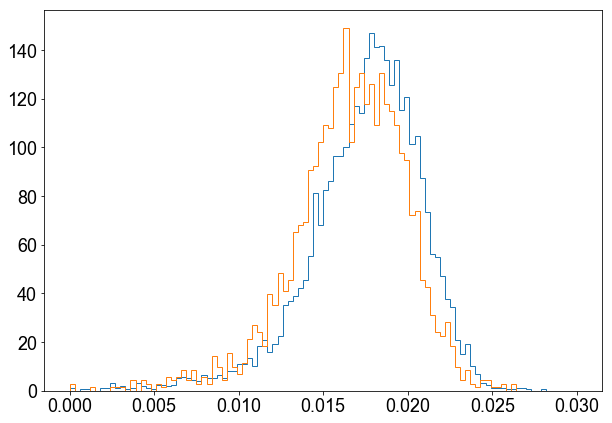

In [49]:
plt.hist(nrness_nr, bins=100, histtype='step', range=(0, 0.03), normed=True)
plt.hist(nrness_er, bins=100, histtype='step', range=(0, 0.03), normed=True)

plt.show()

In [269]:
erness_nr = []
for i in range(len(slice_nr)):
    erness_nr.append(compute_overlap(slice_nr['s1_pulse'].iloc[i], slice_nr['s1_time_from_midpoint_10p'].iloc[i], 
               slice_nr['s1_center_time'].iloc[i], time, amplitude_er))
    
erness_er = []
for i in range(len(slice_er)):
    erness_er.append(compute_overlap(slice_er['s1_pulse'].iloc[i], slice_er['s1_time_from_midpoint_10p'].iloc[i], 
               slice_er['s1_center_time'].iloc[i], time, amplitude_er))

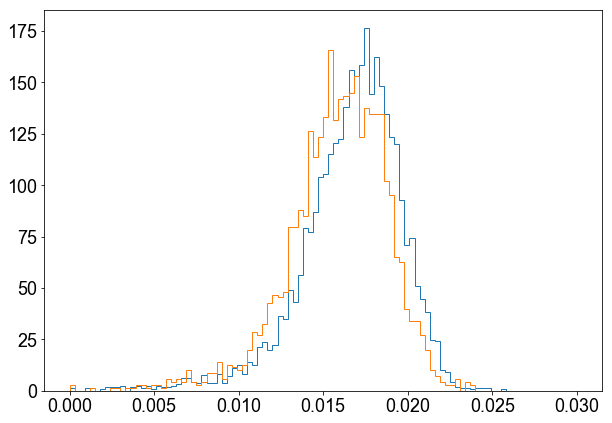

In [270]:
plt.hist(erness_nr, bins=100, histtype='step', range=(0, 0.03), normed=True)
plt.hist(erness_er, bins=100, histtype='step', range=(0, 0.03), normed=True)

plt.show()

In [229]:
slice_nr['s1_time_from_midpoint_10p'].iloc[4]

-16.929516377588342

In [273]:
slice_nr['s1_time_from_midpoint_10p'].iloc[6]

-16.859046052338286

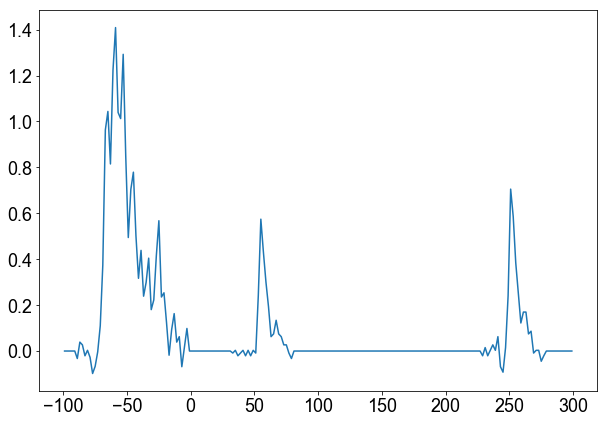

In [271]:
plt.plot(time, slice_nr['s1_pulse'].iloc[6])

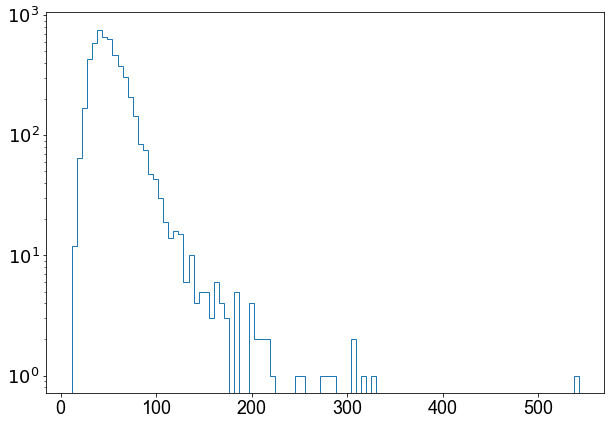

In [279]:
plt.hist(slice_nr['s1_range_80p_area'], bins=100, histtype='step')
plt.yscale('log')
plt.show()

In [280]:
slice_nr_crap = slice_nr[slice_nr['s1_range_80p_area'] > 100]

-12.0415413106


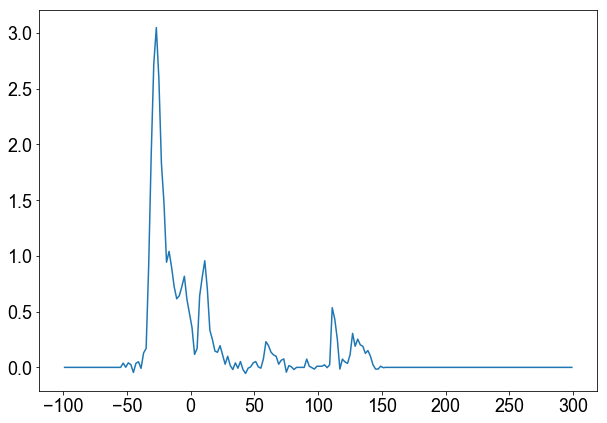

In [290]:
plt.plot(time, slice_nr_crap['s1_pulse'].iloc[6])
print(slice_nr_crap['s1_time_from_midpoint_10p'].iloc[6])

In [294]:
total_area = 0
for bla in slice_nr_crap['s1_pulse'].iloc[6]:
    total_area += bla
print(total_area)
print(slice_nr_crap['s1'].iloc[6])

fractional_area = 0
for i, bla in enumerate(slice_nr_crap['s1_pulse'].iloc[6]):
    fractional_area += bla
    if fractional_area >= 0.1 * total_area:
        print(i)
        print(fractional_area)
        print(time[i])
        break

31.687006898457184
31.6870079041
34
3.267025069333613
-31.0


In [295]:
slice_nr_crap['s1_time_from_midpoint_10p'].iloc[6]

-12.041541310649183

Here is the thing... Time from midpoint is with respect to the 50% area point, which is NOT necessarily the center time...

## Low field

In [14]:
ambe_low = XAMSAnalysis([run_names_ambe_low[0]], processed_data_path, minitree_path)

In [15]:
ambe_low.load(treemakers = ['Basics', 'Fundamentals', S1TimeProperties])

INFO:hax.__init__] Not looking for datasets in runs, db since you put use_runs_db = False


Loaded 86240 (86.2 k) events.
Total live time: 900.1 seconds (0.3 hours)


In [7]:
ambe_low.cut_interaction_exists()

Finite s1 selection: 350091 rows removed (64.63% passed)


### z correction

/home/erik/anaconda3/envs/pax_new/lib/python3.4/site-packages/numpy/lib/function_base.py:583: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/home/erik/anaconda3/envs/pax_new/lib/python3.4/site-packages/numpy/lib/function_base.py:584: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


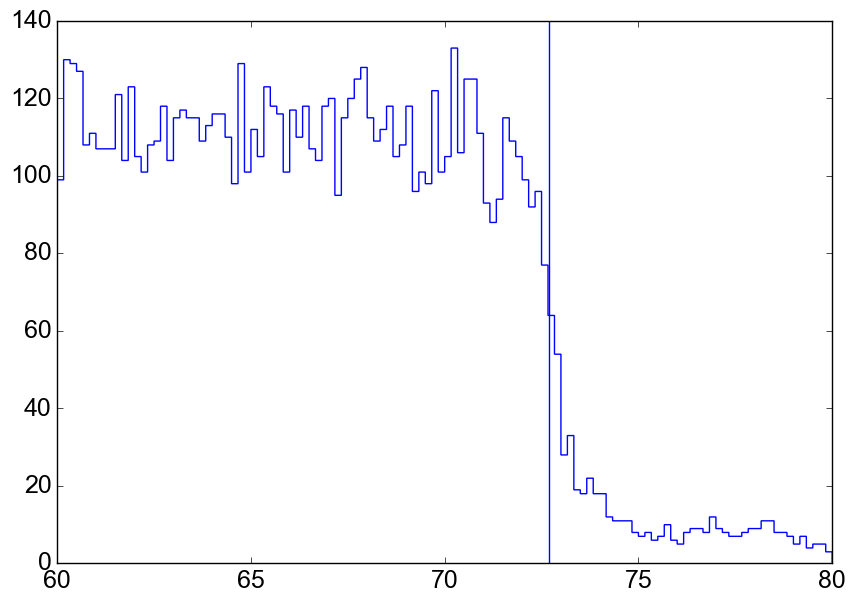

In [17]:
plt.hist(ambe_low.d['drift_time'], bins=120, histtype='step', range=(60, 80))
plt.axvline(72.7)
plt.show()

In [18]:
10 / (72.7 - 1.5)

0.14044943820224717

In [19]:
ambe_low.corr_z(1.5, 1.404)

/home/erik/anaconda3/envs/pax_new/lib/python3.4/site-packages/numpy/lib/function_base.py:583: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/home/erik/anaconda3/envs/pax_new/lib/python3.4/site-packages/numpy/lib/function_base.py:584: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


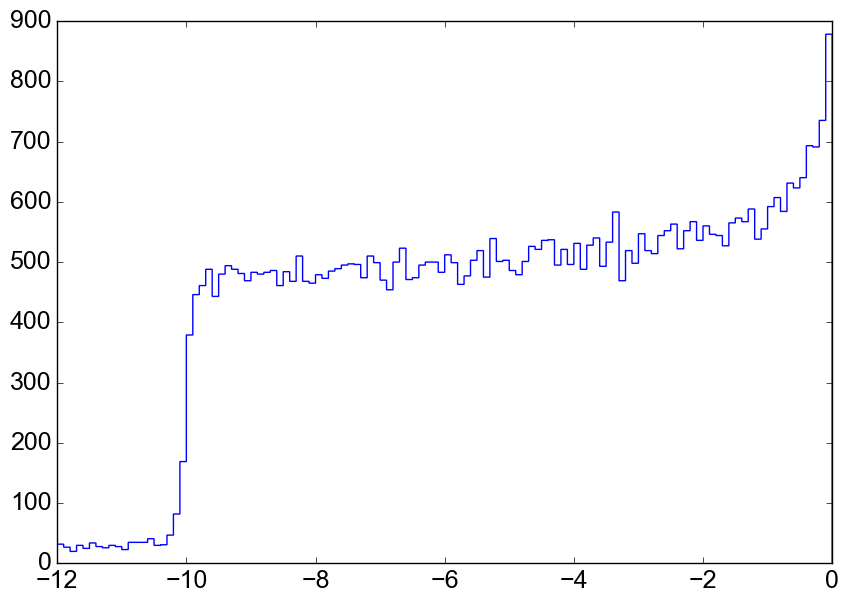

In [20]:
plt.hist(ambe_low.d['z'], bins=120, histtype='step', range=(-12, 0))
plt.show()

ms_since_previous_event above 1.0 selection: 15577 rows removed (81.94% passed)


(1000.0, 100000.0)

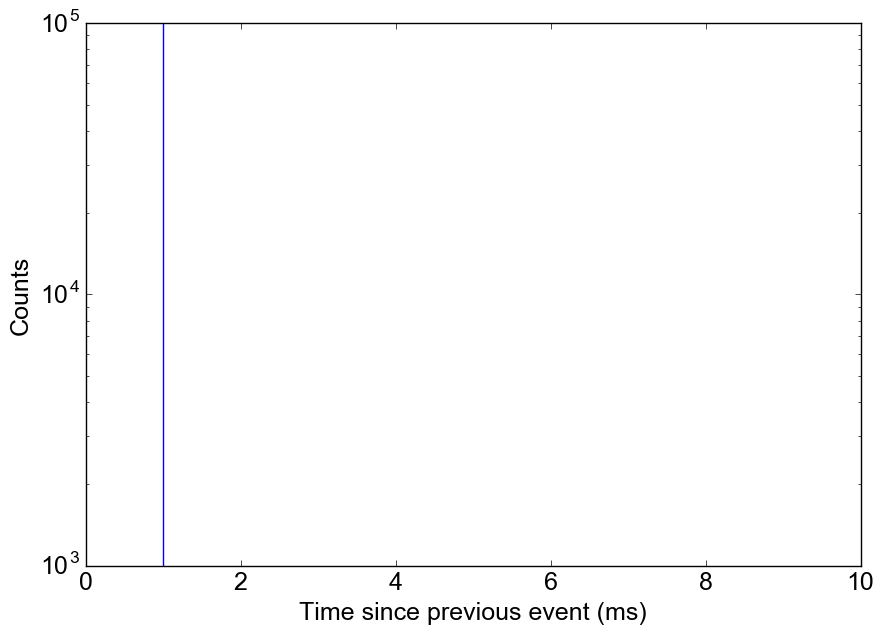

In [27]:
ambe_low.cut_time_since_previous(plot=True, apply=True, bins=100,histtype='step', range=(0, 10))
plt.yscale('log')
plt.ylim(1e3, 1e5)

In [22]:
ambe_low.cut_fiducial_volume()

z in [-9.5, -0.5) selection: 30288 rows removed (57.14% passed)


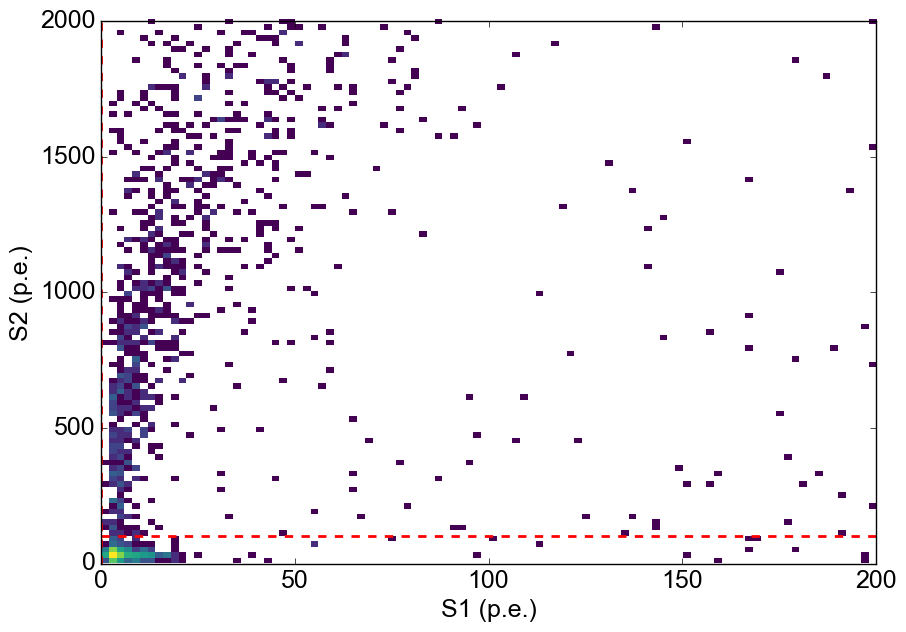

In [23]:
ambe_low.cut_thresholds(s1_threshold=0, s2_threshold=100., plot=True, apply=False, bins=100, norm=LogNorm(),
                        range=((0, 200), (0, 2e3)))

In [25]:

def read_and_cut(run_names, processed_data_path, minitree_path, treemakers = None, field='high', **kwargs):
    x = XAMSAnalysis(run_names, processed_data_path, minitree_path)
    x.load(treemakers=  treemakers, **kwargs)
    if field=='low':
        v_d = 1.404
    elif field=='high':
        v_d = 1.73
    else:
        raise ValueError('Enter a valid field type.')
    x.corr_z(1.5, v_d)
    x.corr_s1_ly_poly(ly_filename='../light_yield/data/cs137_ly_p2_sel2.pickle')
    x.corr_s2_electron_lifetime(pickle_file='../light_yield/data/cs137_electron_lifetime_sel2.pickle', verbose=True)
    x.cut_interaction_exists()
    x.cut_time_since_previous()
    x.cut_fiducial_volume()
    # x.cut_s2_range_50p_area(pickle_file='../light_yield/data/cs137_s2_width.pickle')
    x.cut_thresholds(s1_threshold=0, s2_threshold=100.)
    x.cut_largest_other_s1()
    x.cut_largest_other_s2() 

    print('Events left: %.1f k' % (len(x.d)/1000))
    return x